In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

## TẠO MỚI Lab03.03
2. Giới thiệu tổng quan về thuật toán louvain
3. Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng (công thức, phạm vi, như thế nào là tốt, ....  )
4. Thực hiện phân tích việc (nhận xét)
phát hiện cộng đồng cho mạng xã hội tự chọn

TỔNG QUAN VỀ THUẬT TOÁN LOUVAIN

Thuật toán Louvain là một thuật toán đồ thị được sử dụng để phân cụm đồ thị được sửdụng để phân chia các đỉnh của đồ thị thành các cụm (clusters) dựa trên các liên kết giữa chúng.Thuật toán Louvain được phát triển bởi ba nhà khoa học Vincent Blondel, Jean-Loup Guillaume và Renaud Lambiotte vào năm 2008 tại Đại học Louvain (Université catholique de Louvain) ở Louvain-la-Neuve, Bỉ. Và tên gọi "Louvain" của thuật toán được lấy theo tên trường đại học mà các tác giả đang làm việc tại thời điểm phát triển thuật toán.Thuật toán Louvain có độ phức tạp thời gian trung bình là O(nlog(n)), trong đó n là số lượng đỉnh trong đồ thị.

NGUYÊN LÝ HOẠT ĐỘNG

Thuật toán Louvain hoạt động theo 2 bước lặp chính:

Tối ưu hóa cục bộ modularity:

 -Bắt đầu, mỗi nút được xem là một cộng đồng riêng lẻ.
 -Xét từng nút, thuật toán thử di chuyển nút đó vào cộng đồng lân cận sao cho modularity tăng.
 -Quá trình này lặp lại đến khi không có sự cải thiện nào về modularity.
Tổng hợp (coarsening) cộng đồng:
 -Sau bước đầu tiên, mỗi cộng đồng được gộp lại thành một siêu nút (super-node).
 -Một đồ thị mới được tạo ra, trong đó các siêu nút là các đỉnh, và trọng số của các cạnh được tính dựa trên tổng trọng số giữa các cộng đồng ban đầu.
 -Tiếp tục thực hiện bước 1 trên đồ thị mới này.
Quá trình lặp lại 2 bước trên đến khi không có cải thiện nào về modularity trên toàn bộ đồ thị.


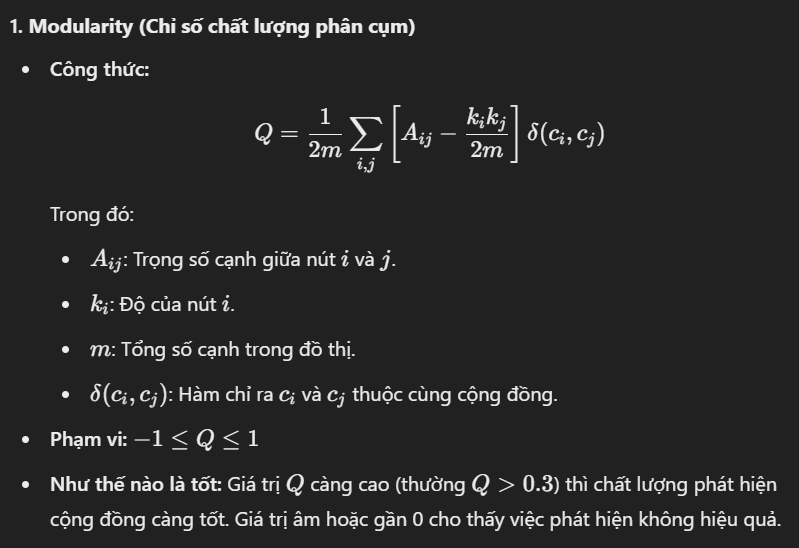
--------------------------------------------------------------------------------
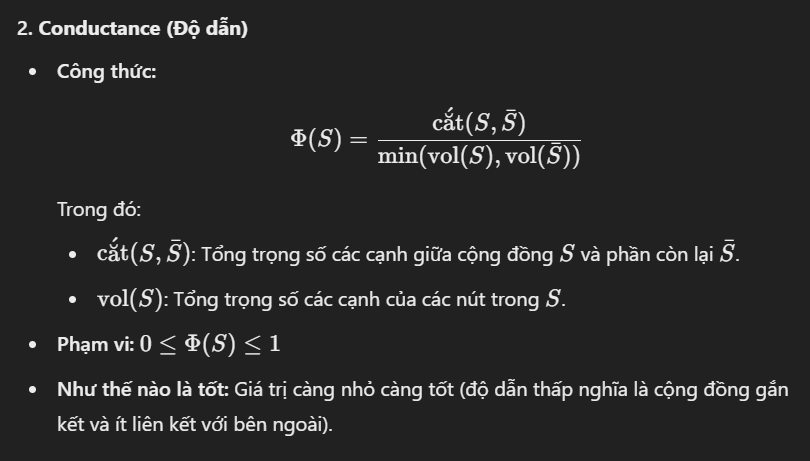
--------------------------------------------------------------------------------
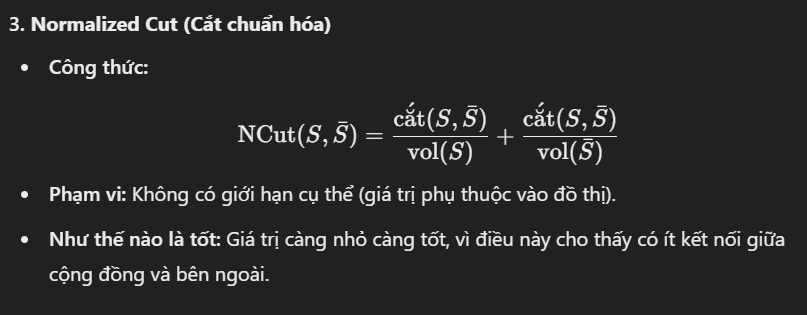
--------------------------------------------------------------------------------
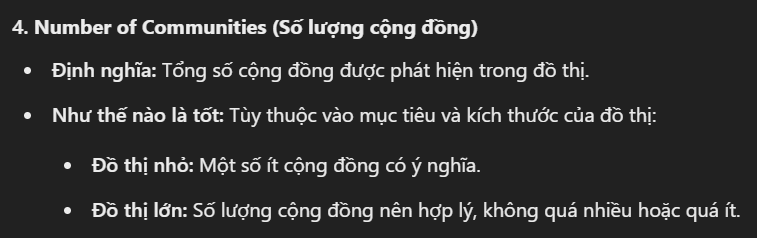
--------------------------------------------------------------------------------
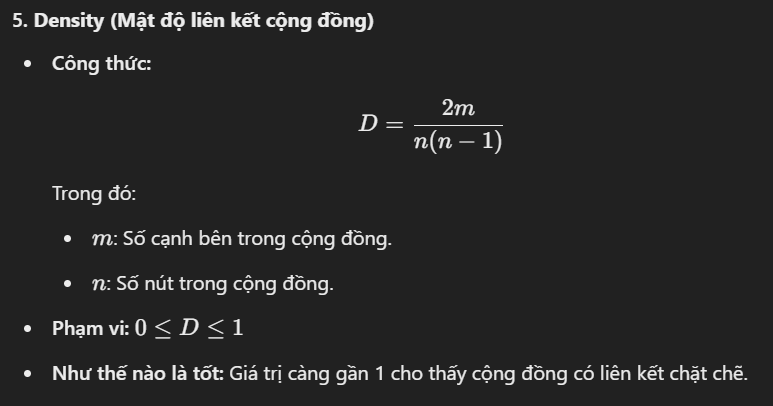
--------------------------------------------------------------------------------
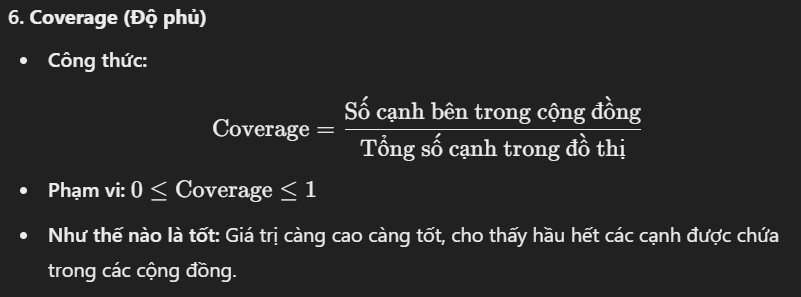
--------------------------------------------------------------------------------
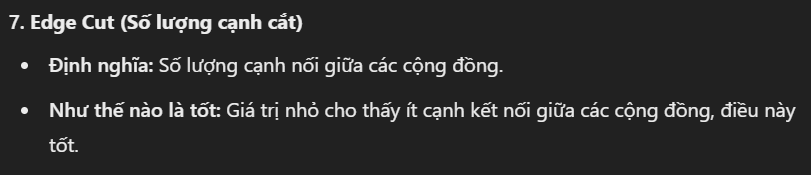

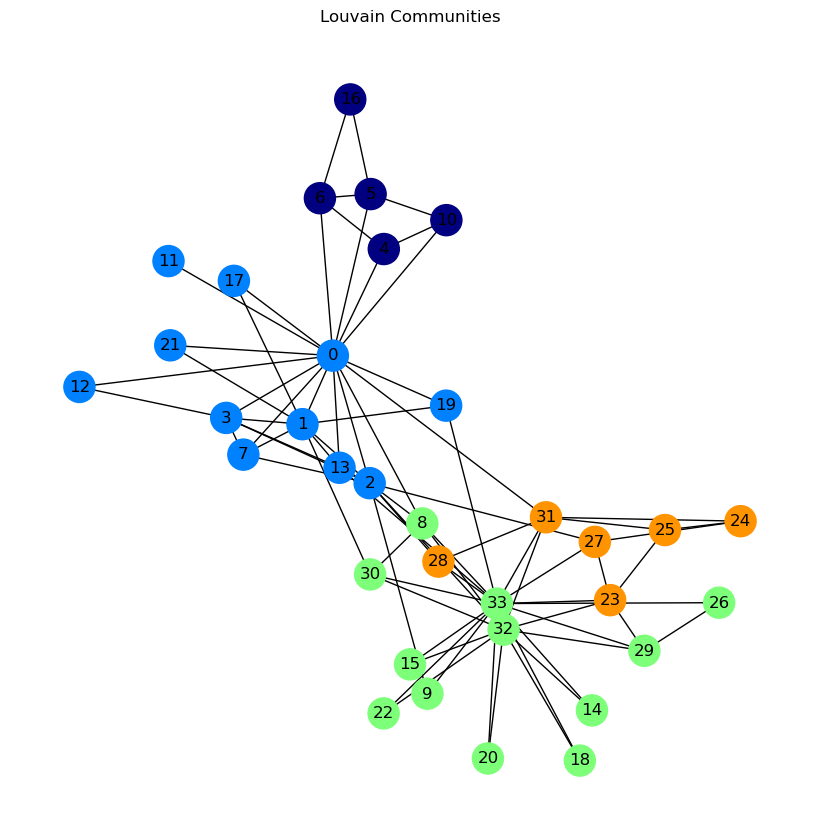

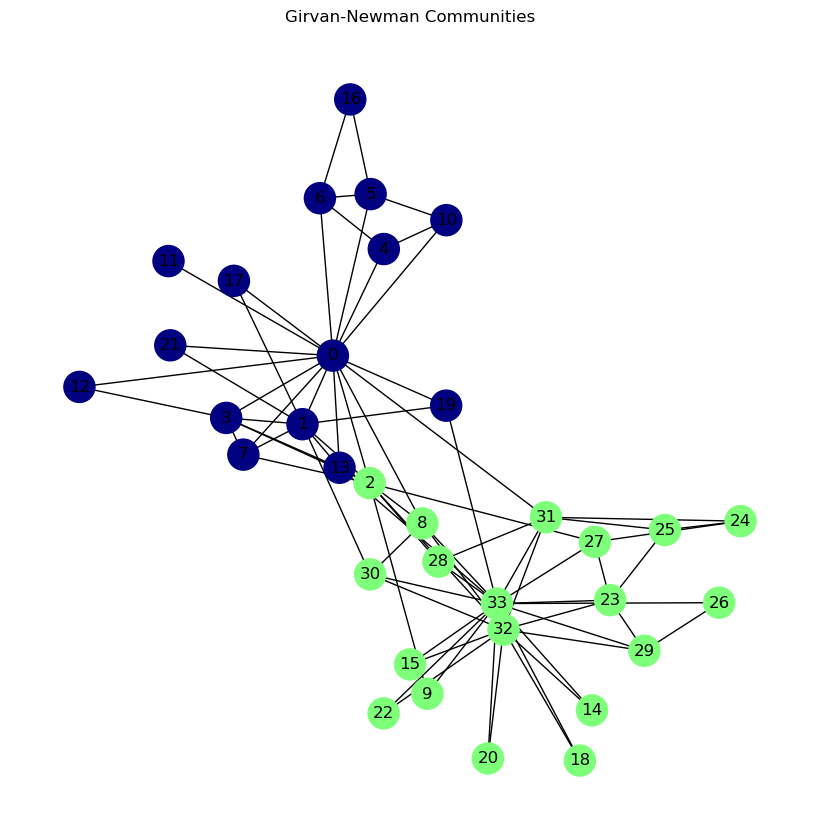

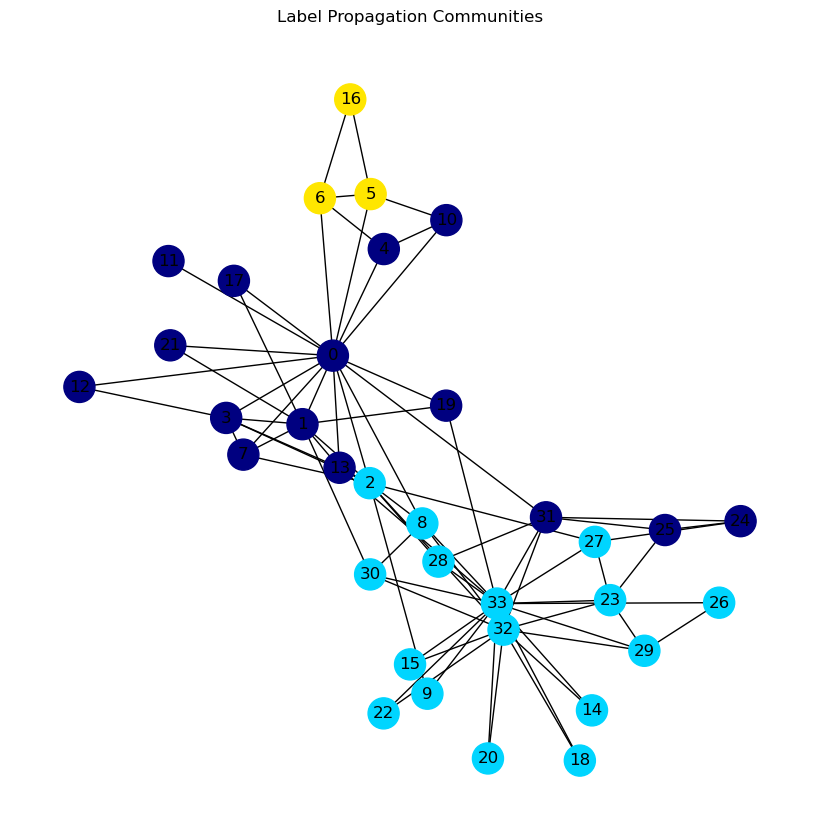

           Algorithm  Num Communities  Modularity  Conductance  Normalized Cut
0            Louvain                4    0.444904     0.287500        0.385041
1      Girvan-Newman                2    0.347660     0.151515        0.262626
2  Label Propagation                3    0.309486     0.281398        0.418541


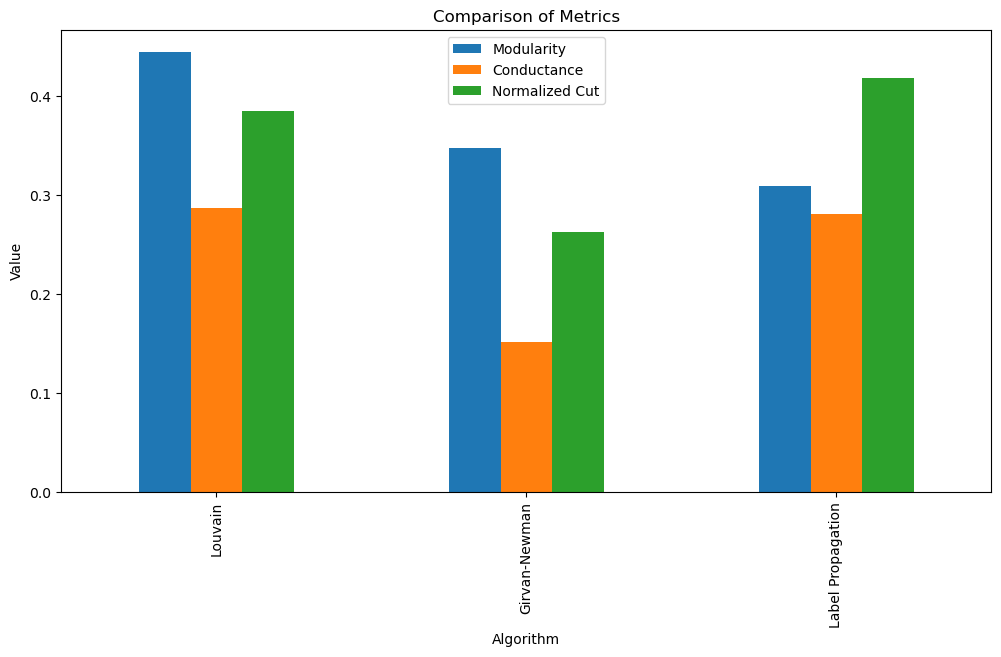

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np

# 1. Load the graph
G = nx.karate_club_graph()

# 2. Apply community detection algorithms
# Louvain
louvain_partition = list(community.louvain_communities(G))

# Girvan-Newman
gn_generator = community.girvan_newman(G)
gn_partition = next(gn_generator)  # Take the first partition

# Label Propagation
lp_partition = list(community.label_propagation_communities(G))

# 3. Calculate metrics for each method
def calculate_metrics(G, partition):
    from networkx.algorithms import cuts
    metrics = {
        'num_communities': len(partition),
        'modularity': community.modularity(G, partition),
        'conductance': np.mean([cuts.conductance(G, c) for c in partition]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in partition])
    }
    return metrics

# Collect metrics
metrics_data = []
algorithms = ["Louvain", "Girvan-Newman", "Label Propagation"]
partitions = [louvain_partition, gn_partition, lp_partition]

for partition, algorithm in zip(partitions, algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

# 4. Visualize the communities
def visualize_communities(G, partition, title):
    pos = nx.spring_layout(G, seed=42)
    colors = [plt.cm.jet(i / len(partition)) for i in range(len(partition))]

    node_colors = []
    for node in G:
        for idx, comm in enumerate(partition):
            if node in comm:
                node_colors.append(colors[idx])
                break

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=500)
    plt.title(title)
    plt.show()

# Visualize results
for partition, algorithm in zip(partitions, algorithms):
    visualize_communities(G, partition, f"{algorithm} Communities")

# 5. Display metrics
import pandas as pd

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

# 6. Compare metrics
metrics_df.plot(x="Algorithm", y=["Modularity", "Conductance", "Normalized Cut"],
                kind="bar", figsize=(12, 6), title="Comparison of Metrics")
plt.ylabel("Value")
plt.show()
